In [ ]:
corpus = [
          "Saya sedang belajar data science",
          "data yang saya proses adalah data teks",
          'NLP adalah cabang besar didalam data science'

]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [ ]:
vect = CountVectorizer()
vect.fit(corpus)

CountVectorizer()

In [ ]:
vect.get_feature_names_out()

array(['adalah', 'belajar', 'besar', 'cabang', 'data', 'didalam', 'nlp',
       'proses', 'saya', 'science', 'sedang', 'teks', 'yang'],
      dtype=object)

# Pemodelan Machine Learning untuk SMS Spam

In [ ]:
!pip install pysastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 22.2 MB/s 


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/afifai/hacktiv8-trial-class-spamdetector/main/data/dataset_sms_spam%20_v1.csv')
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [ ]:
df.label = df.label.map({0:'SMS biasa', 1:'SMS Penipuan', 2:'SMS Operator'})

,Teks,label
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",SMS biasa
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,SMS biasa
1140,Mba mau kirim 300 ya,SMS biasa
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,SMS biasa
1142,No bri atas nama kamu mana,SMS biasa


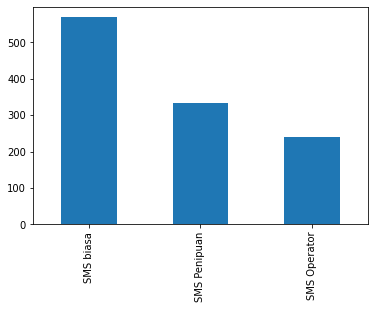

In [ ]:
df.label.value_counts().plot(kind='bar');

In [ ]:
df.label.value_counts()

SMS biasa       569
SMS Penipuan    335
SMS Operator    239
Name: label, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.Teks, df.label, test_size=0.15, random_state=420, stratify=df.label)

In [ ]:
# vektorisasi
vect = CountVectorizer()

# train
X_train_vec = vect.fit_transform(X_train)
X_test_vec = vect.transform(X_test)

In [ ]:
X_train_vec

<971x4451 sparse matrix of type '<class 'numpy.int64'>'
	with 16237 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_vec

<172x4451 sparse matrix of type '<class 'numpy.int64'>'
	with 2438 stored elements in Compressed Sparse Row format>

In [ ]:
# modeling
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
# evaluasi
y_pred = nb.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

SMS Operator       0.95      0.97      0.96        36
SMS Penipuan       0.96      0.98      0.97        50
   SMS biasa       0.99      0.97      0.98        86

    accuracy                           0.97       172
   macro avg       0.96      0.97      0.97       172
weighted avg       0.97      0.97      0.97       172



In [ ]:
sms_baru = ['Selamat ulang tahun brok']
sms_baru_vec = vect.transform(sms_baru)
res = nb.predict(sms_baru_vec)
print(res)

['SMS Penipuan']


## with preprocessing (stop words)

In [ ]:
stp = StopWordRemoverFactory().get_stop_words()

In [ ]:
vect_stp = CountVectorizer(stop_words = stp)

# train
X_train_vec_stp = vect.fit_transform(X_train)
X_test_vec_stp = vect.transform(X_test)

In [ ]:
X_train_vec_stp

<971x4451 sparse matrix of type '<class 'numpy.int64'>'
	with 16237 stored elements in Compressed Sparse Row format>

In [ ]:
# modeling
nb = MultinomialNB()
nb.fit(X_train_vec_stp, y_train)

MultinomialNB()

In [ ]:
# evaluasi
y_pred_stp = nb.predict(X_test_vec_stp)
print(classification_report(y_test, y_pred_stp))

              precision    recall  f1-score   support

SMS Operator       0.95      0.97      0.96        36
SMS Penipuan       0.96      0.98      0.97        50
   SMS biasa       0.99      0.97      0.98        86

    accuracy                           0.97       172
   macro avg       0.96      0.97      0.97       172
weighted avg       0.97      0.97      0.97       172



## with preprocessing (stemming)

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# buat function stem untuk series
def stem_sent(sent):
  output = stemmer.stem(sent)
  return output

In [ ]:
# stemming process
X_train = X_train.apply(stem_sent)
X_test = X_test.apply(stem_sent)

In [ ]:
# vektorisasi
vect = CountVectorizer()

# train
X_train_vec = vect.fit_transform(X_train)
X_test_vec = vect.transform(X_test)

In [ ]:
# modeling
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
# evaluasi
y_pred = nb.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

SMS Operator       0.89      0.94      0.92        36
SMS Penipuan       0.94      0.94      0.94        50
   SMS biasa       0.99      0.97      0.98        86

    accuracy                           0.95       172
   macro avg       0.94      0.95      0.95       172
weighted avg       0.95      0.95      0.95       172



In [ ]:
sms_baru = ['Selamat ulang tahun brok']
sms_baru = [stemmer.stem(sms_baru[0])]
sms_baru_vec = vect.transform(sms_baru)
res = nb.predict(sms_baru_vec)
print(res)

['SMS Penipuan']


# Model Deep Learning & Embedding

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/afifai/hacktiv8-trial-class-spamdetector/main/data/dataset_sms_spam%20_v1.csv')
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.15, random_state=420, stratify=df.label)

In [ ]:
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=69, stratify=train_df.label)

In [ ]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(873, 2)
(98, 2)
(172, 2)


In [ ]:
import random
random_index = random.randint(0, len(train_df) - 5)

for row in train_df[['Teks', 'label']][random_index:random_index+5].itertuples():
  _, teks, target = row
  if target == 0:
    print(f'label : {target} (SMS biasa)')
  elif target == 1:
      print(f'label : {target} (SMS penipuan)')
  elif target == 2:
      print(f'label : {target} (SMS promo)')
  print(f'teks : {teks} \n')
  print('--\n')

label : 0 (SMS biasa)
teks : Iya ih maksimalkan waktu sebulan ini wkwkwk pdhl aku aja yg mo pindah :( 

--

label : 2 (SMS promo)
teks : Migrasikan kartu Anda ke kartuHalo (NOMOR TETAP SAMA). DAPATKAN Paket Spesial 4GB Hanya 25rb/bulan. kunjungi GraPARI & tunjukan SMS ini.(Promo Terbatas).SKB 

--

label : 2 (SMS promo)
teks : Kapan lg beli paket Flash mulai 1,3GB di MyTelkomsel dpt Extra PULSA Rp 50rb? Utk pembelian pertama sjk 25Aug - 25Sept. Cek detail paket di tsel.me/mytsel1 

--

label : 0 (SMS biasa)
teks : Gaaais penamaannya kyk nama1 nih biar rapih 

--

label : 2 (SMS promo)
teks : Dapatkan Disc 20% di McDonalds khusus utk pembayaran dgn TCASH TAP!Dptkan stiker TCASH TAP di graPARI terdekat. Info tsel.me/tappromo 

--



In [ ]:
# siapkan label
from tensorflow.keras.utils import to_categorical
X_train, y_train = train_df.Teks, train_df.label
X_val, y_val = val_df.Teks, val_df.label
X_test, y_test = test_df.Teks, test_df.label

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

In [ ]:
# tokeniasi
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [ ]:
round(sum([len(i.split()) for i in X_train])/len(X_train))

16

In [ ]:
# setup vect
max_vocab_length = 3500
max_length = 16

text_vectorization = TextVectorization(max_tokens = max_vocab_length,
                                       standardize = 'lower_and_strip_punctuation',
                                       split = 'whitespace',
                                       ngrams = None,
                                       output_mode = 'int',
                                       output_sequence_length = max_length,
                                       input_shape=(1,)   # pake ini jika ingin pake sequential API
                                       )

In [ ]:
text_vectorization.adapt(X_train)   # equivalent to .fit

In [ ]:
# sms baru
sample_sms = 'Selamat kamu udah tidak muda lagi'
text_vectorization([sample_sms])

<tf.Tensor: shape=(1, 16), dtype=int64, numpy=
array([[ 32,  53,  81, 138, 624,  98,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0]])>

In [ ]:
text_vectorization.get_vocabulary()[:5]

['', '[UNK]', 'di', 'anda', 'ke']

In [ ]:
text_vectorization.get_vocabulary()[32]

'selamat'

In [ ]:
# embedding layer
from tensorflow.keras.layers import Embedding

embedding = Embedding(input_dim = max_vocab_length,
                      output_dim = 128,    # berbanding lurus dengan jumlah vektor yang dipake(?)
                      embeddings_initializer = 'uniform',
                      input_length = max_length,
                      )

In [ ]:
sample_sms = 'Selamat kamu udah tidak muda lagi'
emb_res = embedding(text_vectorization([sample_sms]))
emb_res.shape

TensorShape([1, 16, 128])

Pemodelan

In [ ]:
# fully connected layer
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input
from tensorflow.keras.models import Model, Sequential

# model = Sequential()
# model.add(TextVectorization)
# model.add(embedding)
# model.add(GlobalAveragePooling1D())
# model.add(Dense(32, activation='relu'))
# model.add(Dense(3, activation='softmax'))

inputs = Input(shape=(1,), dtype='string')
x = text_vectorization(inputs)
x = embedding(x)
x = GlobalAveragePooling1D()(x)
x = Dense(32, activation='relu')(x)
out = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=out) 


model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])


In [ ]:
model_1_hist = model.fit(X_train, y_train_ohe, epochs=50, validation_data=(X_val, y_val_ohe))

Epoch 1/50
28/28 [==============================] - 3s 12ms/step - loss: 1.0515 - accuracy: 0.6541 - val_loss: 0.9759 - val_accuracy: 0.6837
Epoch 2/50
28/28 [==============================] - 0s 5ms/step - loss: 0.8420 - accuracy: 0.8190 - val_loss: 0.7112 - val_accuracy: 0.7551
Epoch 3/50
28/28 [==============================] - 0s 5ms/step - loss: 0.5237 - accuracy: 0.8900 - val_loss: 0.4820 - val_accuracy: 0.8163
Epoch 4/50
28/28 [==============================] - 0s 5ms/step - loss: 0.2908 - accuracy: 0.9485 - val_loss: 0.3867 - val_accuracy: 0.8367
Epoch 5/50
28/28 [==============================] - 0s 5ms/step - loss: 0.1559 - accuracy: 0.9782 - val_loss: 0.3600 - val_accuracy: 0.8571
Epoch 6/50
28/28 [==============================] - 0s 5ms/step - loss: 0.0839 - accuracy: 0.9874 - val_loss: 0.3249 - val_accuracy: 0.8673
Epoch 7/50
28/28 [==============================] - 0s 5ms/step - loss: 0.0497 - accuracy: 0.9931 - val_loss: 0.3365 - val_accuracy: 0.8776
Epoch 8/50
28/28 [=

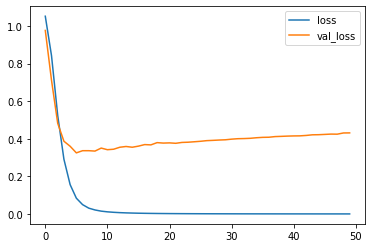

In [ ]:
metrics = pd.DataFrame(model_1_hist.history)
metrics[['loss', 'val_loss']].plot();

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_val)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        49
           1       0.76      0.90      0.83        29
           2       0.86      0.95      0.90        20

    accuracy                           0.89        98
   macro avg       0.88      0.90      0.88        98
weighted avg       0.90      0.89      0.89        98



In [ ]:
sms_baru = [
            'hai bro gimana kabar',
            'dapatkan kuota 1 GB hanya 1 juta rupiah',
            'pesugihan tidak halal, lipatgandakan dosa anda'
]

hasil = model.predict(sms_baru)
hasil.argmax(axis=1)

array([0, 2, 0])

In [ ]:
# model LSTM
from tensorflow.keras.layers import LSTM, Dropout

model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(Dropout(0.4))
model.add(LSTM(4))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))
 

model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model_2_hist = model.fit(X_train, y_train_ohe, epochs=50, validation_data=(X_val, y_val_ohe))

Epoch 1/50
28/28 [==============================] - 3s 26ms/step - loss: 1.0022 - accuracy: 0.5487 - val_loss: 0.9056 - val_accuracy: 0.6327
Epoch 2/50
28/28 [==============================] - 0s 7ms/step - loss: 0.7855 - accuracy: 0.7045 - val_loss: 0.7151 - val_accuracy: 0.7449
Epoch 3/50
28/28 [==============================] - 0s 7ms/step - loss: 0.5753 - accuracy: 0.7881 - val_loss: 0.6171 - val_accuracy: 0.7347
Epoch 4/50
28/28 [==============================] - 0s 7ms/step - loss: 0.4326 - accuracy: 0.8477 - val_loss: 0.5747 - val_accuracy: 0.7245
Epoch 5/50
28/28 [==============================] - 0s 7ms/step - loss: 0.3251 - accuracy: 0.9118 - val_loss: 0.4091 - val_accuracy: 0.8367
Epoch 6/50
28/28 [==============================] - 0s 7ms/step - loss: 0.2618 - accuracy: 0.9278 - val_loss: 0.4467 - val_accuracy: 0.8367
Epoch 7/50
28/28 [==============================] - 0s 7ms/step - loss: 0.2166 - accuracy: 0.9324 - val_loss: 0.4539 - val_accuracy: 0.8469
Epoch 8/50
28/28 [=

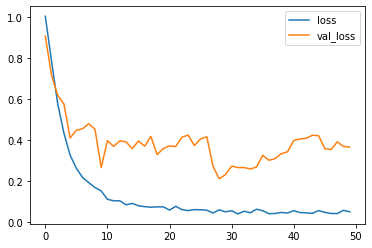

In [ ]:
metrics = pd.DataFrame(model_2_hist.history)
metrics[['loss', 'val_loss']].plot();

In [ ]:
y_pred = model.predict(X_val)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        49
           1       0.86      0.86      0.86        29
           2       0.83      0.95      0.88        20

    accuracy                           0.92        98
   macro avg       0.90      0.92      0.90        98
weighted avg       0.92      0.92      0.92        98



In [ ]:
sms_baru = [
            'hai bro gimana kabar',
            'dapatkan kuota 1 GB hanya 1 juta rupiah',
            'pesugihan tidak halal, lipatgandakan dosa anda'
]

hasil = model.predict(sms_baru)
hasil.argmax(axis=1)

array([0, 2, 0])

In [ ]:
# model GRU
from tensorflow.keras.layers import GRU

model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(Dropout(0.4))
model.add(GRU(2))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))
 

model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model_3_hist = model.fit(X_train, y_train_ohe, epochs=50, validation_data=(X_val, y_val_ohe))

Epoch 1/50
28/28 [==============================] - 3s 22ms/step - loss: 1.0696 - accuracy: 0.3047 - val_loss: 1.0321 - val_accuracy: 0.5306
Epoch 2/50
28/28 [==============================] - 0s 7ms/step - loss: 0.9941 - accuracy: 0.4903 - val_loss: 0.9593 - val_accuracy: 0.6122
Epoch 3/50
28/28 [==============================] - 0s 6ms/step - loss: 0.9000 - accuracy: 0.6300 - val_loss: 0.8700 - val_accuracy: 0.6531
Epoch 4/50
28/28 [==============================] - 0s 7ms/step - loss: 0.7985 - accuracy: 0.6678 - val_loss: 0.7895 - val_accuracy: 0.6735
Epoch 5/50
28/28 [==============================] - 0s 6ms/step - loss: 0.7103 - accuracy: 0.6747 - val_loss: 0.7405 - val_accuracy: 0.6735
Epoch 6/50
28/28 [==============================] - 0s 6ms/step - loss: 0.6588 - accuracy: 0.6816 - val_loss: 0.7082 - val_accuracy: 0.6735
Epoch 7/50
28/28 [==============================] - 0s 6ms/step - loss: 0.6145 - accuracy: 0.6816 - val_loss: 0.6748 - val_accuracy: 0.6837
Epoch 8/50
28/28 [=

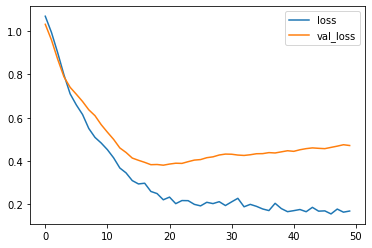

In [ ]:
metrics = pd.DataFrame(model_3_hist.history)
metrics[['loss', 'val_loss']].plot();

In [ ]:
y_pred = model.predict(X_val)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        49
           1       0.79      0.66      0.72        29
           2       0.74      0.85      0.79        20

    accuracy                           0.85        98
   macro avg       0.82      0.82      0.82        98
weighted avg       0.85      0.85      0.84        98



In [ ]:
sms_baru = [
            'hai bro gimana kabar',
            'dapatkan kuota 1 GB hanya 1 juta rupiah',
            'pesugihan tidak halal, lipatgandakan dosa anda'
]

hasil = model.predict(sms_baru)
hasil.argmax(axis=1)

array([0, 2, 0])